## Iris Species

- https://www.kaggle.com/benhamner/python-data-visualizations
- https://www.kaggle.com/ash316/ml-from-scratch-with-iris

In [1]:
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [2]:
# Next, we'll load the Iris flower dataset, which is in the "../input/" directory
iris = pd.read_csv("iris/iris.csv") # the iris dataset is now a Pandas DataFrame

# Let's see what's in the iris data - Jupyter notebooks print the result of the last thing you do
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Let's see how many examples we have of each species
iris["Species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

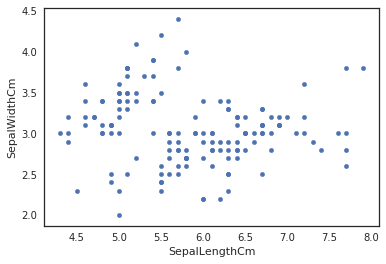

In [4]:
# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the Iris features.
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


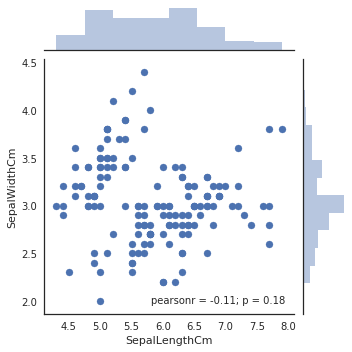

In [5]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)

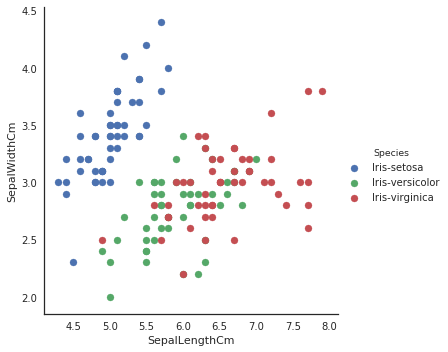

In [6]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

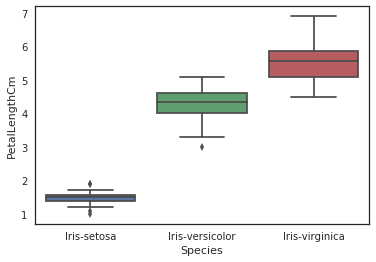

In [7]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

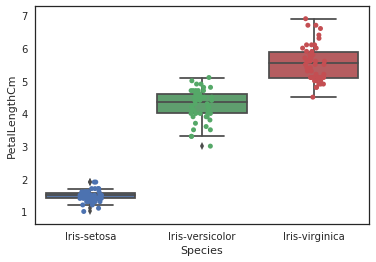

In [8]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

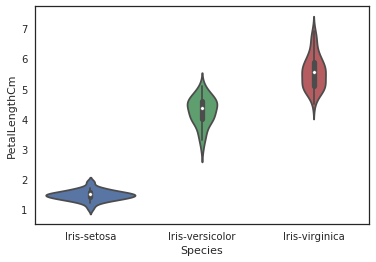

In [9]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6)

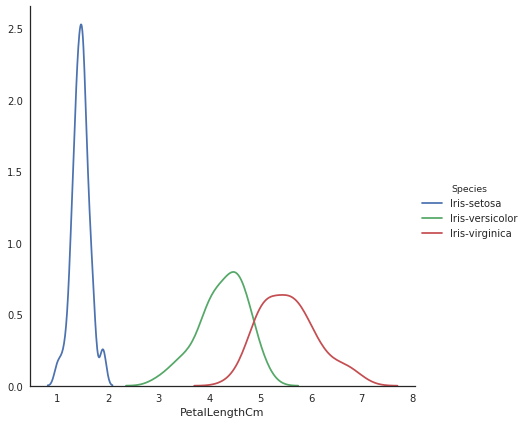

In [10]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(iris, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

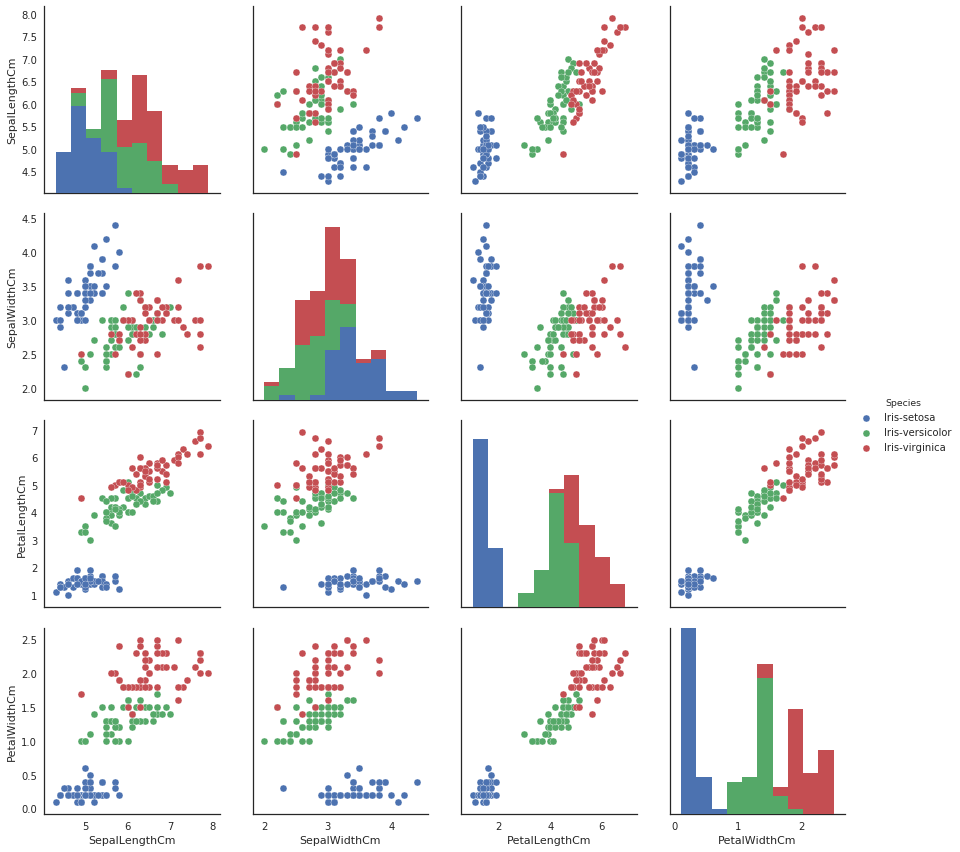

In [11]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)

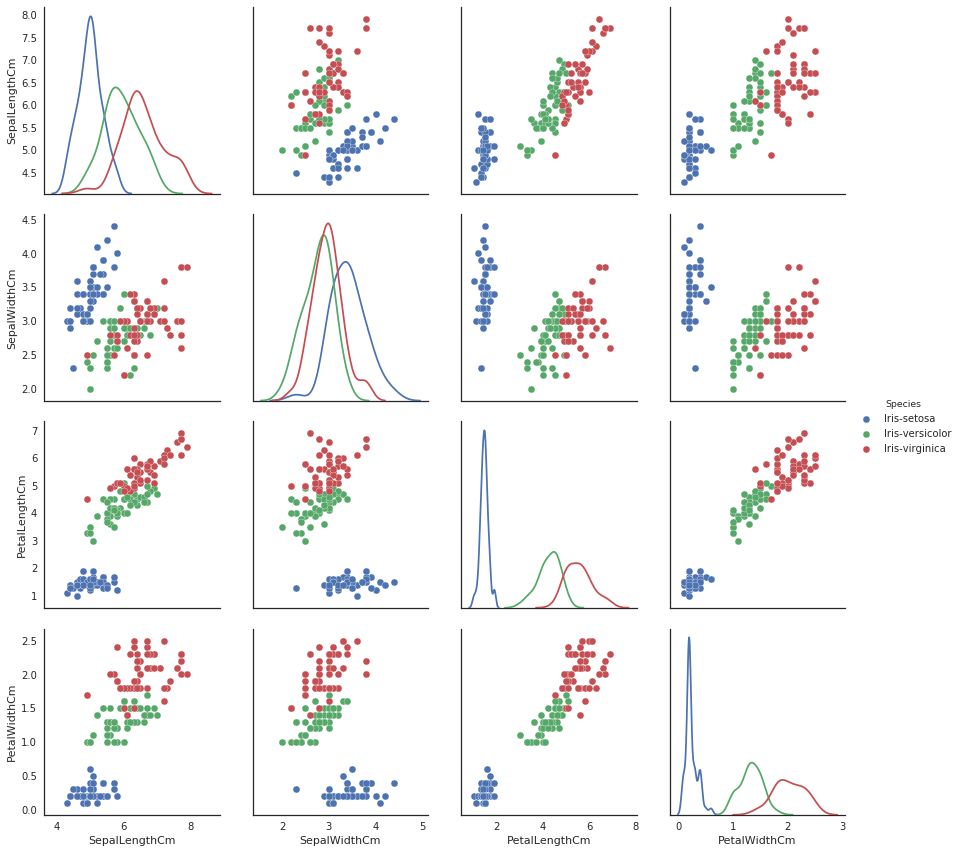

In [12]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xa49c31cc>,
      dtype=object)

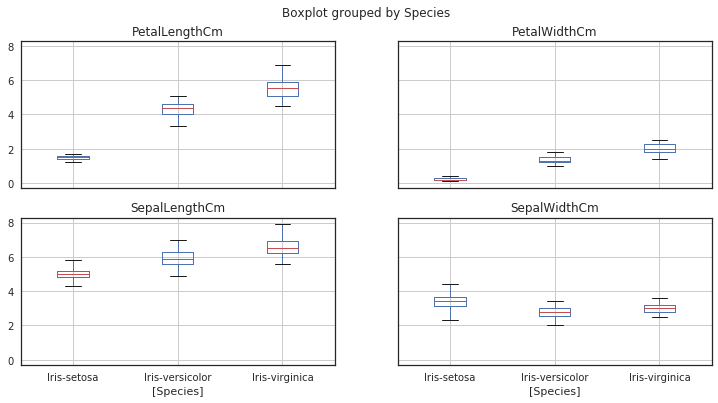

In [13]:
# Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))

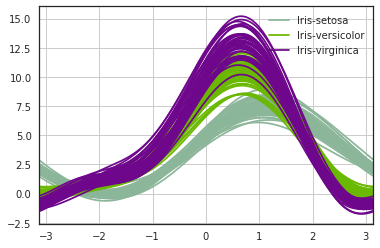

In [14]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.tools.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")

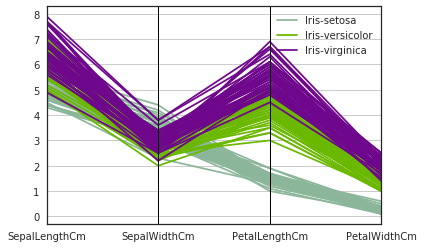

In [15]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis=1), "Species")

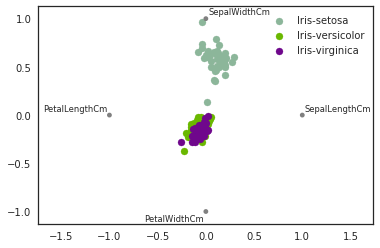

In [16]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.tools.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species")

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
iris.head(2) #show the first 2 rows from the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [19]:
iris.info()  #checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [20]:
# Removing the unneeded column
iris.drop('Id', axis=1, inplace=True)

#dropping the Id column as it is unecessary,
#axis=1 specifies that it should be column wise
#inplace=1 means the changes should be reflected into the dataframe

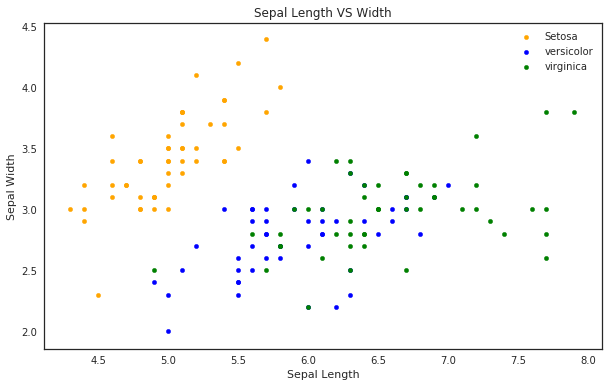

In [21]:
# Some Exploratory Data Analysis With Iris

fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter', \
  x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')

iris[iris.Species=='Iris-versicolor'].plot(kind='scatter', \
  x='SepalLengthCm', y='SepalWidthCm', color='blue', label='versicolor', ax=fig)

iris[iris.Species=='Iris-virginica'].plot(kind='scatter', \
  x='SepalLengthCm', y='SepalWidthCm', color='green', label='virginica', ax=fig)

fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")

fig = plt.gcf()
fig.set_size_inches(10,6)
plt.show()

# The graph shows relationship between the sepal length and width.

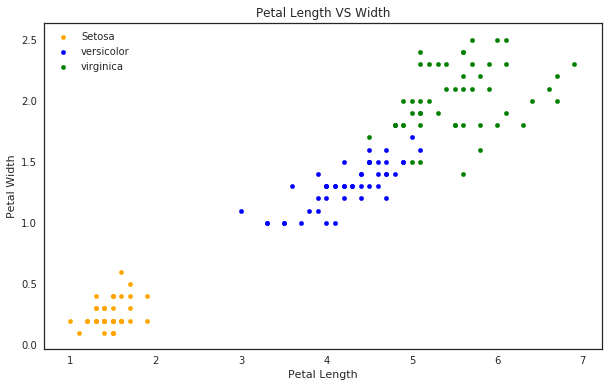

In [22]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(\
  x='PetalLengthCm', y='PetalWidthCm', color='orange', label='Setosa')

iris[iris.Species=='Iris-versicolor'].plot.scatter(\
  x='PetalLengthCm', y='PetalWidthCm', color='blue', label='versicolor', ax=fig)

iris[iris.Species=='Iris-virginica'].plot.scatter(\
  x='PetalLengthCm', y='PetalWidthCm', color='green', label='virginica', ax=fig)

fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length VS Width")

fig = plt.gcf()
fig.set_size_inches(10,6)
plt.show()

# Now we will check relationship between the petal length and width.
# As we can see that the Petal Features are giving a better cluster division compared to the Sepal features.
# This is an indication that the Petals can help in better and accurate Predictions over the Sepal.

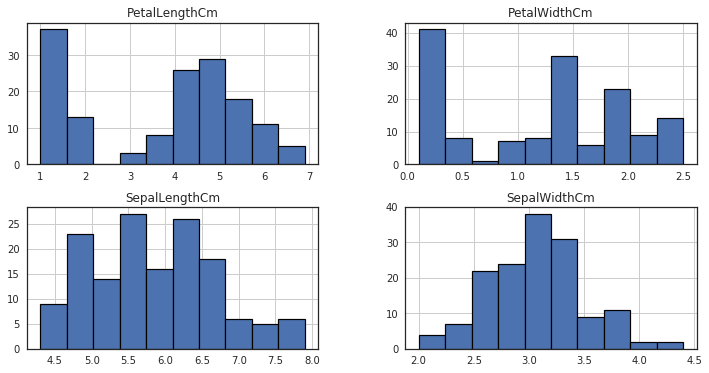

In [23]:
# Now let us see how are the length and width are distributed

iris.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

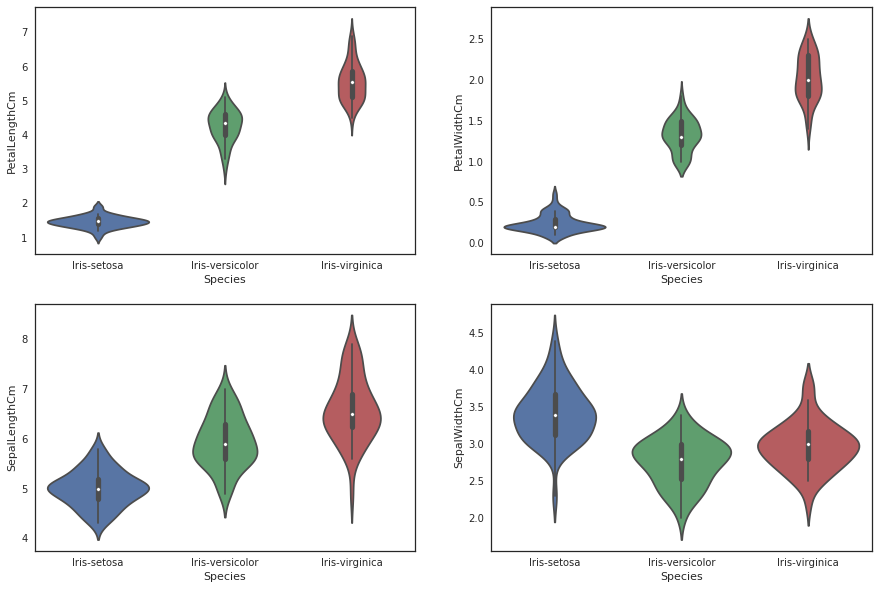

In [24]:
# Now let us see how the length and width vary according to the species

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)

plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)

plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)

plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

# The violinplot shows density of the length and width in the species.
# The thinner part denotes that there is less density whereas the fatter part conveys higher density.

In [25]:
# Now the given problem is a classification problem.
# Thus we will be using the classification algorithms to build a model.

# importing all the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.cross_validation import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

/opt/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
#get the shape of the dataset
iris.shape

(150, 5)

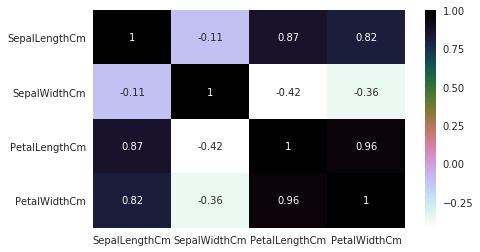

In [27]:
#draws heatmap with input as the correlation matrix calculted by(iris.corr())
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r')
plt.show()

# The Sepal Width and Length are not correlated.
# The Petal Width and Length are highly correlated.

# We will use all the features for training the algorithm and check the accuracy.

In [28]:
# 1) Split the dataset into training and testing dataset.
# The testing dataset is generally smaller than training one as it will help in training the model better.

# in this our main data is split into train and test
train, test = train_test_split(iris, test_size = 0.3)

# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [29]:
# taking the training data features
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

# output of our training data
train_y = train.Species

# taking test data features
test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

# output value of test data
test_y = test.Species

In [30]:
train_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,4.6,3.6,1.0,0.2
12,4.8,3.0,1.4,0.1


In [31]:
test_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
49,5.0,3.3,1.4,0.2
9,4.9,3.1,1.5,0.1


In [32]:
train_y.head() # output of the training data

22         Iris-setosa
12         Iris-setosa
75     Iris-versicolor
137     Iris-virginica
40         Iris-setosa
Name: Species, dtype: object

In [33]:
# 2) Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
# 3) Then pass the training dataset to the algorithm to train it. We use the .fit() method
# 4) Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.
# 5) We then check the accuracy by passing the predicted outcome and the actual output to the model.

# A) Support Vector Machine (SVM)

model = svm.SVC() #select the algorithm
model.fit(train_X, train_y) # we train the algorithm with the training data and the training output

prediction = model.predict(test_X) # now we pass the testing data to the trained algorithm

# now we check the accuracy of the algorithm. 
# we pass the predicted output by the model and the actual output
print('The accuracy of the SVM is:', metrics.accuracy_score(prediction, test_y))

# SVM is giving very good accuracy. We will continue to check the accuracy for different models.

The accuracy of the SVM is: 1.0


In [34]:
# B) Logistic Regression

model = LogisticRegression()
model.fit(train_X, train_y)

prediction = model.predict(test_X)

print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction, test_y))

The accuracy of the Logistic Regression is 0.9777777777777777


In [35]:
# C) Decision Tree

model = DecisionTreeClassifier()
model.fit(train_X, train_y)

prediction = model.predict(test_X)

print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction, test_y))

The accuracy of the Decision Tree is 0.9555555555555556


In [36]:
# D) K-Nearest Neighbours

#this examines 3 neighbours for putting the new data into a class
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_X, train_y)

prediction = model.predict(test_X)

print('The accuracy of the KNN is', metrics.accuracy_score(prediction, test_y))

The accuracy of the KNN is 0.9555555555555556


([<matplotlib.axis.XTick at 0xa256738c>,
 <a list of 10 Text xticklabel objects>)

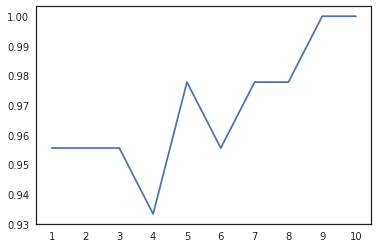

In [38]:
# Let's check the accuracy for various values of n for K-Nearest nerighbours

a_index = list(range(1,11))
a = pd.Series()
x = [1,2,3,4,5,6,7,8,9,10]

for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_y)))
    
plt.plot(a_index, a)
plt.xticks(x)

# graph showing the accuracy for the KNN models using different values of n

In [39]:
# Creating Petals And Sepals Training Data

petal = iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal = iris[['SepalLengthCm','SepalWidthCm','Species']]

# petals
train_p, test_p = train_test_split(petal, test_size=0.3, random_state=0)
train_x_p = train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p = train_p.Species
test_x_p = test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p = test_p.Species

# sepals
train_s, test_s = train_test_split(sepal, test_size=0.3, random_state=0)
train_x_s = train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s = train_s.Species
test_x_s = test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s = test_s.Species

In [40]:
# SVM

model = svm.SVC()
model.fit(train_x_p, train_y_p) 
prediction = model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:', metrics.accuracy_score(prediction, test_y_p))

model = svm.SVC()
model.fit(train_x_s, train_y_s) 
prediction = model.predict(test_x_s) 
print('The accuracy of the SVM using Sepals is:', metrics.accuracy_score(prediction, test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepals is: 0.8


In [41]:
# Logistic Regression

model = LogisticRegression()
model.fit(train_x_p, train_y_p) 
prediction = model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:', metrics.accuracy_score(prediction, test_y_p))

model.fit(train_x_s, train_y_s) 
prediction = model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:', metrics.accuracy_score(prediction, test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.6888888888888889
The accuracy of the Logistic Regression using Sepals is: 0.6444444444444445


In [42]:
# Decision Tree

model = DecisionTreeClassifier()
model.fit(train_x_p, train_y_p) 
prediction = model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:', metrics.accuracy_score(prediction, test_y_p))

model.fit(train_x_s,train_y_s) 
prediction = model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:', metrics.accuracy_score(prediction, test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6666666666666666


In [47]:
# K-Nearest Neighbours

model = KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p, train_y_p) 
prediction = model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:', metrics.accuracy_score(prediction, test_y_p))

model.fit(train_x_s, train_y_s) 
prediction = model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:', metrics.accuracy_score(prediction, test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.6888888888888889


Observations:
- Using Petals over Sepal for training the data gives a much better accuracy.
- This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.